In [1]:
# This will take a while
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import plotly.offline as py

# for dataset visibility
#pd.set_option('display.max_columns', None)

# Set a seed for reproducibility
np.random.seed(42)

# Load dataset from data understanding
df_incident_du = pd.read_csv('../ds/cleaned/incidents_cleaned.csv')
df_poverty_du = pd.read_csv('../ds/cleaned/poverty_cleaned.csv')
df_years_state_du = pd.read_csv('../ds/cleaned/year_state_votes_cleaned.csv')

df_poverty_du.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              357 non-null    object 
 1   year               357 non-null    int64  
 2   povertyPercentage  357 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.5+ KB


In [2]:
# We need to do merge function from pandas
df_merged = pd.merge(df_incident_du ,df_poverty_du, on=['state', 'year'], how='left')

# Assuming df_merged is your DataFrame
df_merged = pd.merge(df_merged, df_years_state_du, on=['state', 'year', 'congressional_district'], how='left')


### 4. *Ratio of unharmed people in the incident w.r.t. the average of unharmed people involved in incidents for the same period*

In [3]:
# Grouping by year and calculating the average number of unharmed people involved in incidents for each year
average_unharmed_per_year = df_merged.groupby('year')['n_unharmed'].mean()

# Merging the average back to the original DataFrame based on the 'year' column
df_merged_unharmed = df_merged.merge(average_unharmed_per_year, on='year', suffixes=('', '_avg'))

# Computing the ratio of unharmed people in each incident to the average for the respective year
df_merged_unharmed['unharmed_ratio'] = df_merged_unharmed['n_unharmed'] / df_merged_unharmed['n_unharmed_avg']

df_merged_unharmed = df_merged_unharmed[['year', 'n_unharmed', 'unharmed_ratio']]



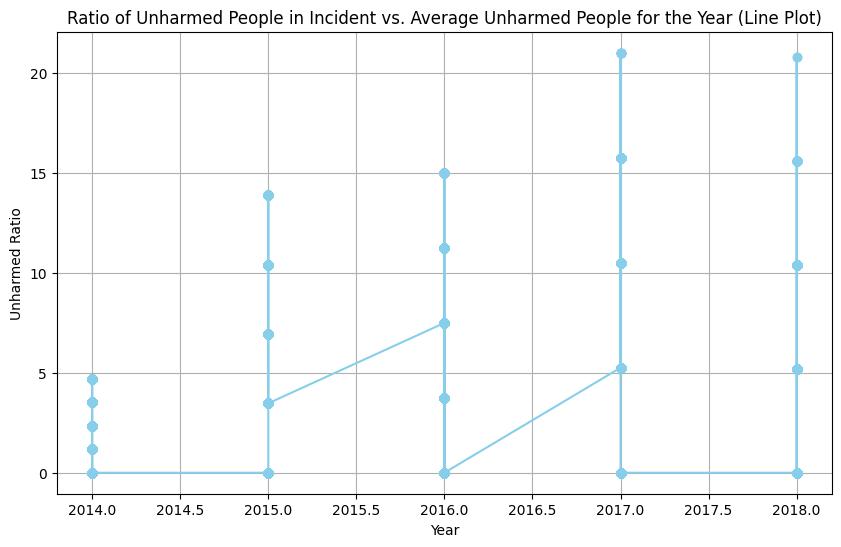

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df_merged_unharmed['year'], df_merged_unharmed['unharmed_ratio'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Unharmed Ratio')
plt.title('Ratio of Unharmed People in Incident vs. Average Unharmed People for the Year (Line Plot)')
plt.grid(True)
plt.show()


In [5]:
"""
plt.figure(figsize=(10, 6))
plt.bar(df_merged_unharmed['year'], df_merged_unharmed['unharmed_ratio'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Unharmed Ratio')
plt.title('Ratio of Unharmed People in Incident vs. Average Unharmed People for the Year (Bar Plot)')
plt.show()
"""


"\nplt.figure(figsize=(10, 6))\nplt.bar(df_merged_unharmed['year'], df_merged_unharmed['unharmed_ratio'], color='skyblue')\nplt.xlabel('Year')\nplt.ylabel('Unharmed Ratio')\nplt.title('Ratio of Unharmed People in Incident vs. Average Unharmed People for the Year (Bar Plot)')\nplt.show()\n"

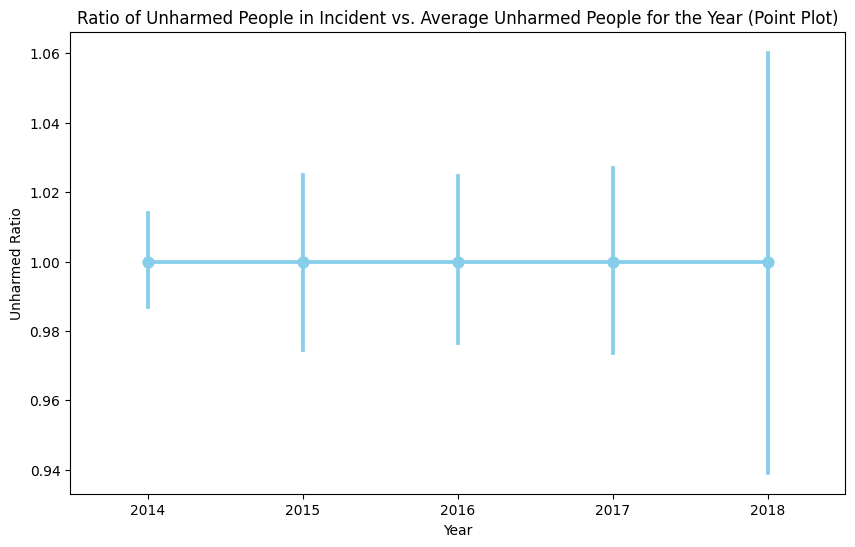

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.pointplot(x='year', y='unharmed_ratio', data=df_merged_unharmed, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Unharmed Ratio')
plt.title('Ratio of Unharmed People in Incident vs. Average Unharmed People for the Year (Point Plot)')
plt.show()


In [7]:
# Save the indicator dataframe to csv

#Group by year and unharm ratio
df_merged_unharmed = df_merged_unharmed.groupby(['year', 'unharmed_ratio']).size().reset_index(name='counts')
df_merged_unharmed = df_merged_unharmed[['year', 'unharmed_ratio']]

file_path = "../ds/cleaned/index_4_cleaned.csv"
df_merged_unharmed.to_csv(file_path, index=False)
df_merged_unharmed.head(10)

,year,unharmed_ratio
0,2014,0.000000
1,2014,1.172595
2,2014,2.345189
3,2014,3.517784
4,2014,4.690378
5,2015,0.000000
6,2015,3.474419
7,2015,6.948837
8,2015,10.423256
9,2015,13.897674
